# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

* Observed Trend 1: Temperature is higher in the Equatorial region
* Observed Trend 2: Percentage of cloud cover is higher in the higher further away from the Equator
* Observed Trend 3: Maximum Wind Speed is higher in the Equatorial region

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = date.today()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
settings = {"APPID": api_key, "units": "imperial", "lang": "EN"}
keys = ["clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon","main.temp_max", "wind.speed"]
df = pd.DataFrame(columns=['City','Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# Write a logfile of each city as it is being processed with the city name and number
logfile = open("output_data/cities.log", "w")

print("Beginning Data Retrieval")
print("-----------------------------")

i = 0
setCnt = 1

for city in cities:
    
    i = i + 1
    
    print(f"Processing Record {i} of Set {setCnt} | {city}")
    
    try:
        data = owm.get_current(city, **settings)
        df = df.append({'City':city, 'Cloudiness':data('clouds.all'), 'Country':data('sys.country'), 'Date':data('dt'),
                        'Humidity':data('main.humidity'),'Lat':data('coord.lat'),'Lng':data('coord.lon'),
                        'Max Temp': data("main.temp_max"),'Wind Speed': data("wind.speed")}, ignore_index=True)
        logfile.write(f"{city},{data('id')}\n")
    except:
        print("City not found. Skipping...")   

    if i == 25:
        print('Sleeping...')
        time.sleep(40)
        i = 0
        setCnt = setCnt + 1
    
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

logfile.close()


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | solnechnyy
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | benavente
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | amapa
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | sedro-woolley
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Se

Processing Record 11 of Set 8 | zhaoyuan
Processing Record 12 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 8 | ancud
Processing Record 14 of Set 8 | saldanha
Processing Record 15 of Set 8 | abu samrah
Processing Record 16 of Set 8 | upernavik
Processing Record 17 of Set 8 | pyapon
Processing Record 18 of Set 8 | bubaque
Processing Record 19 of Set 8 | sartana
Processing Record 20 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 8 | samarai
Processing Record 22 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 23 of Set 8 | jamnagar
Processing Record 24 of Set 8 | raudeberg
Processing Record 25 of Set 8 | grand river south east
City not found. Skipping...
Sleeping...
Processing Record 1 of Set 9 | nigde
Processing Record 2 of Set 9 | charters towers
Processing Record 3 of Set 9 | ilulissat
Processing Record 4 of Set 9 | zhanatas
City not found. Skipping...
Processing Record 5 of Set 9 | barbar
City not found. S

Processing Record 17 of Set 15 | sisimiut
Processing Record 18 of Set 15 | hvolsvollur
City not found. Skipping...
Processing Record 19 of Set 15 | komsomolskiy
Processing Record 20 of Set 15 | papetoai
Processing Record 21 of Set 15 | bud
Processing Record 22 of Set 15 | yendi
Processing Record 23 of Set 15 | gloucester
Processing Record 24 of Set 15 | tigil
Processing Record 25 of Set 15 | pacific grove
Sleeping...
Processing Record 1 of Set 16 | caravelas
Processing Record 2 of Set 16 | bandarbeyla
Processing Record 3 of Set 16 | mount isa
Processing Record 4 of Set 16 | babu
Processing Record 5 of Set 16 | corowa
Processing Record 6 of Set 16 | santa barbara
Processing Record 7 of Set 16 | praia
Processing Record 8 of Set 16 | marzuq
Processing Record 9 of Set 16 | tlanchinol
Processing Record 10 of Set 16 | at-bashi
Processing Record 11 of Set 16 | mocuba
Processing Record 12 of Set 16 | margate
Processing Record 13 of Set 16 | sterling
Processing Record 14 of Set 16 | kachkanar
P

Processing Record 20 of Set 22 | hua hin
Processing Record 21 of Set 22 | yarensk
Processing Record 22 of Set 22 | khani
Processing Record 23 of Set 22 | mahibadhoo
Processing Record 24 of Set 22 | west bay
Processing Record 25 of Set 22 | carballo
Sleeping...
Processing Record 1 of Set 23 | candawaga
City not found. Skipping...
Processing Record 2 of Set 23 | vostok
Processing Record 3 of Set 23 | puerto del rosario
Processing Record 4 of Set 23 | palmares do sul
Processing Record 5 of Set 23 | mishkino
Processing Record 6 of Set 23 | anloga
Processing Record 7 of Set 23 | le robert
Processing Record 8 of Set 23 | khandyga
Processing Record 9 of Set 23 | kyshtovka
Processing Record 10 of Set 23 | nanlong
Processing Record 11 of Set 23 | palmer
Processing Record 12 of Set 23 | otaru
Processing Record 13 of Set 23 | poum
Processing Record 14 of Set 23 | araouane
Processing Record 15 of Set 23 | wattegama
Processing Record 16 of Set 23 | iqaluit
Processing Record 17 of Set 23 | tromso
Pr

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
export_csv = df.to_csv ('output_data/export_dataframe.csv', index = None, header=True) 

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,solnechnyy,100,RU,1567680841,98,50.72,136.64,60.37,4.52
1,yellowknife,90,CA,1567680841,93,62.45,-114.38,46.40,8.05
2,benavente,20,ES,1567680841,39,42.00,-5.67,70.00,5.82
3,amapa,20,HN,1567680842,83,15.09,-87.97,77.00,4.70
4,souillac,90,FR,1567680842,59,45.60,-0.60,68.00,8.05


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,solnechnyy,100,RU,1567680841,98,50.72,136.64,60.37,4.52
1,yellowknife,90,CA,1567680841,93,62.45,-114.38,46.40,8.05
2,benavente,20,ES,1567680841,39,42.00,-5.67,70.00,5.82
3,amapa,20,HN,1567680842,83,15.09,-87.97,77.00,4.70
4,souillac,90,FR,1567680842,59,45.60,-0.60,68.00,8.05


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 9 columns):
City          544 non-null object
Cloudiness    544 non-null object
Country       544 non-null object
Date          544 non-null object
Humidity      544 non-null object
Lat           544 non-null float64
Lng           544 non-null float64
Max Temp      544 non-null float64
Wind Speed    544 non-null float64
dtypes: float64(4), object(5)
memory usage: 38.3+ KB


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<module 'matplotlib.pyplot' from '/Users/victordituro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

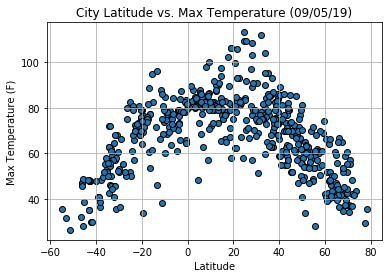

In [10]:

latitude_x = df['Lat']
max_temp_y = df['Max Temp']

# Generate the Graph
plt.scatter(
    latitude_x, 
    max_temp_y, 
    edgecolors="black", label="Test")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({today.strftime("%m/%d/%y")})')
plt.grid()

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Max_Temp.png")

plt

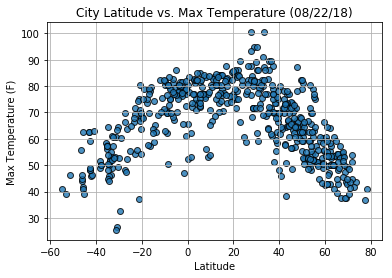

#### Latitude vs. Humidity Plot

<module 'matplotlib.pyplot' from '/Users/victordituro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

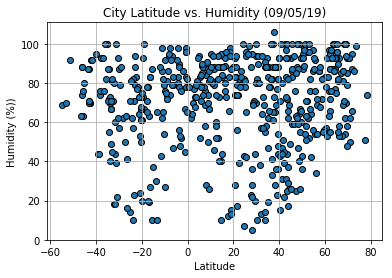

In [11]:

latitude_x = df['Lat']
humidity_y = df['Humidity']

# Generate the Graph
plt.scatter(
    latitude_x, 
    humidity_y, 
    edgecolors="black", label="Test")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title(f'City Latitude vs. Humidity ({today.strftime("%m/%d/%y")})')
plt.grid()

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Humidity.png")

plt

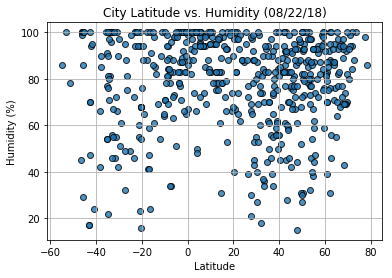

#### Latitude vs. Cloudiness Plot

<module 'matplotlib.pyplot' from '/Users/victordituro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

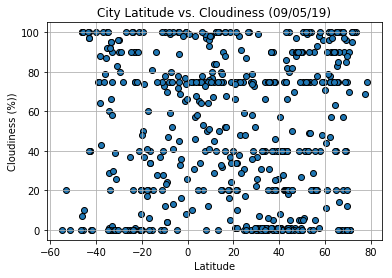

In [12]:

latitude_x = df['Lat']
cloudiness_y = df['Cloudiness']

# Generate the Graph
plt.scatter(
    latitude_x, 
    cloudiness_y, 
    edgecolors="black", label="Test")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title(f'City Latitude vs. Cloudiness ({today.strftime("%m/%d/%y")})')
plt.grid()

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Cloudiness.png")

plt

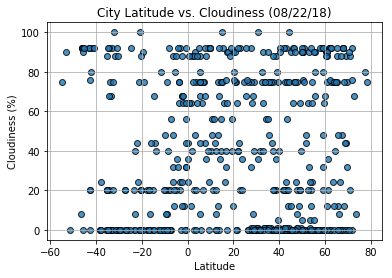

#### Latitude vs. Wind Speed Plot

<module 'matplotlib.pyplot' from '/Users/victordituro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

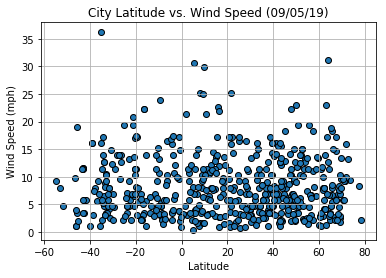

In [13]:

latitude_x = df['Lat']
wind_speed_y = df['Wind Speed']

# Generate the Graph
plt.scatter(
    latitude_x, 
    wind_speed_y, 
    edgecolors="black", label="Test")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({today.strftime("%m/%d/%y")})')
plt.grid()

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Wind_Speed.png")

plt

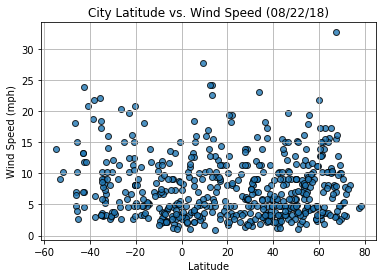